In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/comedianscorpus/comedians/joe.txt
/kaggle/input/comedianscorpus/comedians/louis.txt
/kaggle/input/comedianscorpus/comedians/ricky.txt
/kaggle/input/comedianscorpus/comedians/anthony.txt
/kaggle/input/comedianscorpus/comedians/dave.txt
/kaggle/input/comedianscorpus/comedians/bo.txt
/kaggle/input/comedianscorpus/comedians/jim.txt
/kaggle/input/comedianscorpus/comedians/hasan.txt
/kaggle/input/comedianscorpus/comedians/bill.txt
/kaggle/input/comedianscorpus/comedians/ali.txt
/kaggle/input/comedianscorpus/comedians/mike.txt
/kaggle/input/comedianscorpus/comedians/john.txt


In [36]:
import csv

def text_to_csv(folder_path, output_csv):
    with open(output_csv, 'w', newline='', encoding='utf-8') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(['Dosya Adı', 'İçerik'])

        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if file.endswith('.txt'):
                    file_path = os.path.join(root, file)
                    try:
                        with open(file_path, 'r', encoding='ISO-8859-1', errors='replace') as text_file:
                            content = text_file.read().replace('\x00', '')  # Okunamayan karakter yerine boşluk koy ve null karakterlerden kurtul
                            csv_writer.writerow([file, content])
                    except Exception as e:
                        print(f"Hata: Dosya {file_path} okunamadı. Hata: {e}")

folder_path = '/kaggle/input/comedianscorpus/comedians'
output_csv = 'output.csv'

text_to_csv(folder_path, output_csv)


In [37]:
df = pd.read_csv("/kaggle/working/output.csv")
df.head()

,Dosya Adı,İçerik
0,joe.txt,]q(X­[rock music playing] [audience cheerin...
1,louis.txt,]q(XÆIntro\nFade the music out. Letâs rol...
2,ricky.txt,]q(X\nHello. Hello! How you doing? Great. T...
3,anthony.txt,"]q(X-Thank you. Thank you. Thank you, San F..."
4,dave.txt,]q(XÆThis is Dave. He tells dirty jokes for...


In [38]:
en_stop_words = pd.read_csv("/kaggle/input/stop-words-in-28-languages/english.txt",header=None)

In [39]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Temizleme işlemleri için bir fonksiyon tanımla
def clean_text(text):
    # Küçük harfe çevir
    text = text.lower()
    # Özel karakterleri kaldır
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Stop words'leri kaldır
    words = word_tokenize(text)
    words = [word for word in words if word not in en_stop_words]
    return ' '.join(words)



In [40]:
# 'İçerik' sütununu temizle
df['temizlenmiş_içerik'] = df['İçerik'].apply(clean_text)

In [41]:
df.head()

,Dosya Adı,İçerik,temizlenmiş_içerik
0,joe.txt,]q(X­[rock music playing] [audience cheerin...,qxrock music playing audience cheering announc...
1,louis.txt,]q(XÆIntro\nFade the music out. Letâs rol...,qxintro fade the music out lets roll hold ther...
2,ricky.txt,]q(X\nHello. Hello! How you doing? Great. T...,qx hello hello how you doing great thank you w...
3,anthony.txt,"]q(X-Thank you. Thank you. Thank you, San F...",qxthank you thank you thank you san francisco ...
4,dave.txt,]q(XÆThis is Dave. He tells dirty jokes for...,qxthis is dave he tells dirty jokes for a livi...


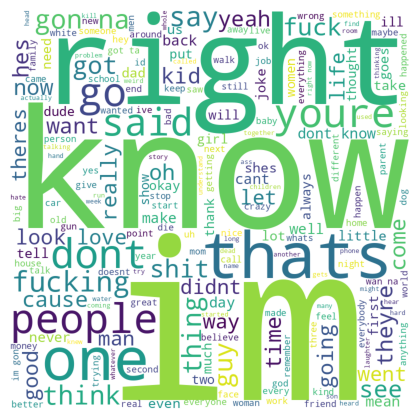

In [42]:
from wordcloud import WordCloud

# metinleri birleştir
text = " ".join(df['temizlenmiş_içerik'])

# kelime bulutu nesnesi oluştur
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# kelime bulutunu görselleştir
plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# kelime bulutunu ekranda göster
plt.show()
